### Lonet Joseph

### November 15, 2023

### Web Scraping project for IMDb 

### Web Scraping with requests and Beautiful Soup

In [37]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define the User-Agent header before making the request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.0.0 Safari/537.36"
}

url = 'https://m.imdb.com/chart/top/'
response = requests.get(url, headers=headers)
status = response.status_code

if status == 200:
    page = response.text
    soup = bs(page, 'html.parser')
    # Now you can work with the 'soup' object to parse the HTML content.
else:
    print(f"Oops! Received status code {status}")


In [43]:
print(soup.prettify())
print(type(soup))

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1701103868296);
        }
    })
  </script>
  <title>
   IMDb Top 250 Movies
  </title>
  <meta content="As rated by regular IMDb voters." data-id="main" name="description"/>
  <meta content="IMDb" property="og:site_name"/>
  <meta content="IMDb Top 250 Movies" property="og:title"/>
  

### Scrape data from one page and store in a DataFrame

In [10]:
# Find the movie titles
movie_titles = []

# The movie titles are within <h3> tags
titles = soup.find_all('h3')
for title in titles:
    movie_titles.append(title.text.strip())
    
# Now you have the movie titles in the 'movie_titles' list

In [11]:
# Print the scraped movie titles
print("Movie Titles:")
for title in movie_titles:
    print(title)
    
movies_df = pd.DataFrame(movie_titles, columns=["Movie Titles"])

Movie Titles:
IMDb Charts
1. The Shawshank Redemption
2. The Godfather
3. The Dark Knight
4. The Godfather Part II
5. 12 Angry Men
6. Schindler's List
7. The Lord of the Rings: The Return of the King
8. Pulp Fiction
9. The Lord of the Rings: The Fellowship of the Ring
10. The Good, the Bad and the Ugly
11. Forrest Gump
12. Fight Club
13. The Lord of the Rings: The Two Towers
14. Inception
15. Star Wars: Episode V - The Empire Strikes Back
16. The Matrix
17. Goodfellas
18. One Flew Over the Cuckoo's Nest
19. Se7en
20. It's a Wonderful Life
21. Seven Samurai
22. Interstellar
23. The Silence of the Lambs
24. Saving Private Ryan
25. City of God
26. Life Is Beautiful
27. Spider-Man: Across the Spider-Verse
28. The Green Mile
29. Star Wars: Episode IV - A New Hope
30. Terminator 2: Judgment Day
31. Back to the Future
32. Spirited Away
33. The Pianist
34. Psycho
35. Parasite
36. Gladiator
37. The Lion King
38. Léon: The Professional
39. American History X
40. The Departed
41. Whiplash
42. The

In [12]:
movies_df

,Movie Titles
0,IMDb Charts
1,1. The Shawshank Redemption
2,2. The Godfather
3,3. The Dark Knight
4,4. The Godfather Part II
...,...
258,Top 250 TV Shows
259,Lowest Rated Movies
260,Most Popular Celebs
261,Top Rated Movies by Genre


### Create a function to extract data from the first 50 movie titles out of the 250 movies in the dataset
Notes: IMDb Website do not allow me to scrape from multiple urls so I had to use the IMDb's official API by installing IMDbPY. 
       I use the first 50 movie titles because it takes too long to print the output for 250 movies.

In [61]:
from imdb import IMDb
import pandas as pd

# Create an instance of the IMDb class
ia = IMDb()

# List of IMDb IDs for the movies (converted to integer format)
movie_ids = [
    '0111161', '0068646', '0468569', '0071562', '0050083',
    '0108052', '0167260', '0110912', '0120737', '0060196',
    '0109830', '0137523', '0167261', '1375666', '0080684',
    '0133093', '0099685', '0073486', '0114369', '0038650',
    '0118799', '0114814', '0102926', '0034583', '0082971',
    '0120586', '0076759', '0054215', '0047396', '0120815',
    '0110413', '0110357', '0816692', '0245429', '0120689',
    '0057012', '0078788', '0407887', '0078748', '8503618',
    '0088763', '0253474', '0119698', '0469494', '0050825',
    '0051201', '1345836', '0090605', '0105236', '0120735'
]

# Function to extract data for a movie and return it as a dictionary
def extract_movie_data(movie_id):
    movie = ia.get_movie(movie_id)
    movie_data = {
        "Title": movie["title"],
        "Year": movie["year"],
        "Genres": ", ".join(movie["genres"]),
        "Directors": ", ".join([d["name"] for d in movie["directors"]]),
        "Rating": movie["rating"],
        "Votes": movie["votes"],
    }
    return movie_data

# Create a list of dictionaries for all the movies
movies_data_list = [extract_movie_data(movie_id) for movie_id in movie_ids]

# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame(movies_data_list)

In [48]:
 df

,Title,Year,Genres,Directors,Rating,Votes
0,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3,2823606
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,9.2,1968141
2,The Dark Knight,2008,"Action, Crime, Drama, Thriller",Christopher Nolan,9.0,2805095
3,The Godfather Part II,1974,"Crime, Drama",Francis Ford Coppola,9.0,1335931
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,9.0,841832
5,Schindler's List,1993,"Biography, Drama, History",Steven Spielberg,9.0,1419163
6,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama, Fantasy",Peter Jackson,9.0,1933479
7,Pulp Fiction,1994,"Crime, Drama",Quentin Tarantino,8.9,2165215
8,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama, Fantasy",Peter Jackson,8.8,1960365
9,"The Good, the Bad and the Ugly",1966,"Adventure, Western",Sergio Leone,8.8,795457


### Data Analysis and Visualization

### 1. Which director has made the most movies in the dataset?

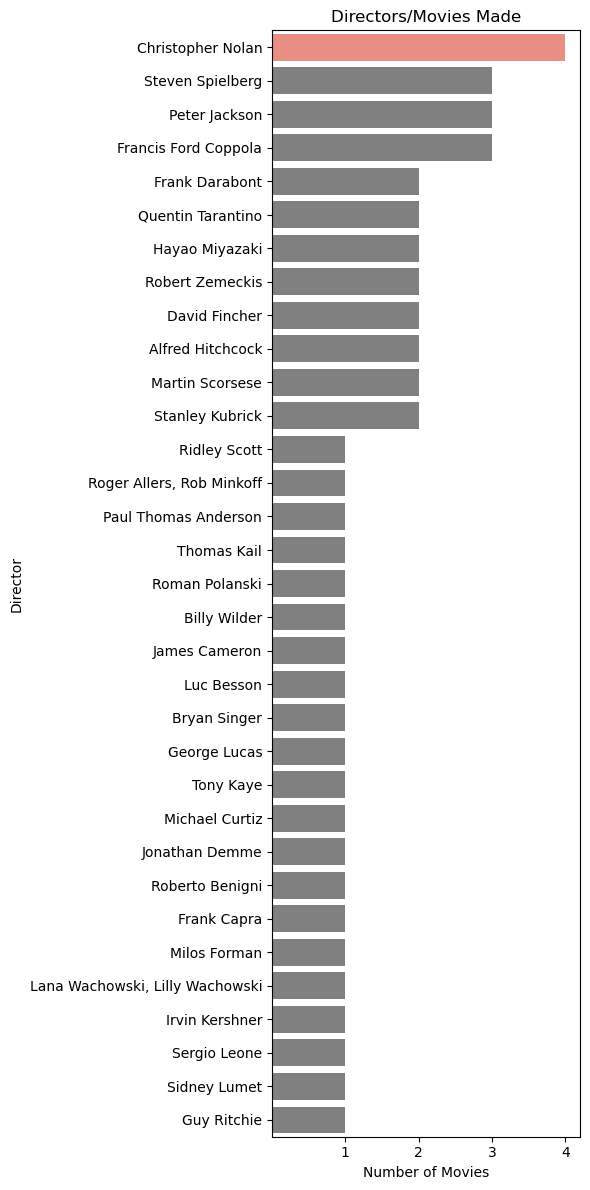

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of movies made by each director
director_movie_counts = df['Directors'].value_counts()

# Find the director with the highest number of movies
max_movies_director = director_movie_counts.idxmax()

# Create a list of colors, where the highest director is colored differently
colors = ['salmon' if director == max_movies_director else 'grey' for director in director_movie_counts.index]

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 12))  # Swap width and height for vertical plot
sns.barplot(x=director_movie_counts.values, y=director_movie_counts.index, palette=colors)
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Directors/Movies Made')

# Manually set x-axis ticks to start from 1 and increment by 1
plt.xticks(range(1, max(director_movie_counts) + 1, 1))

plt.tight_layout()

# Show the plot
plt.show()


### 2. What are the most common genres in the dataset? 

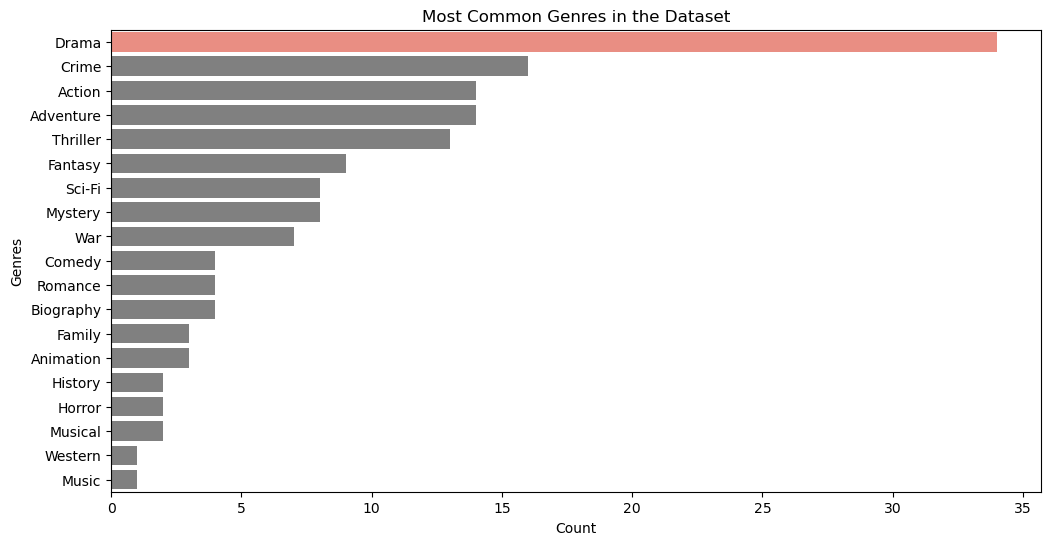

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the genres column into individual genre values and stack them into a Series
genre_counts = df['Genres'].str.split(', ').explode()

# Count the occurrence of each genre
genre_counts = genre_counts.value_counts()

# Determine the genre with the highest count
most_common_genre = genre_counts.idxmax()

# Create a Seaborn bar plot with a different color for the most common genre
plt.figure(figsize=(12, 6))
palette = ['salmon' if genre == most_common_genre else 'grey' for genre in genre_counts.index]
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=palette)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Most Common Genres in the Dataset')
plt.show()

### 3. Which genre in the dataset has the highest average IMDb votes?

The genre with the highest average IMDb votes is 'Action'


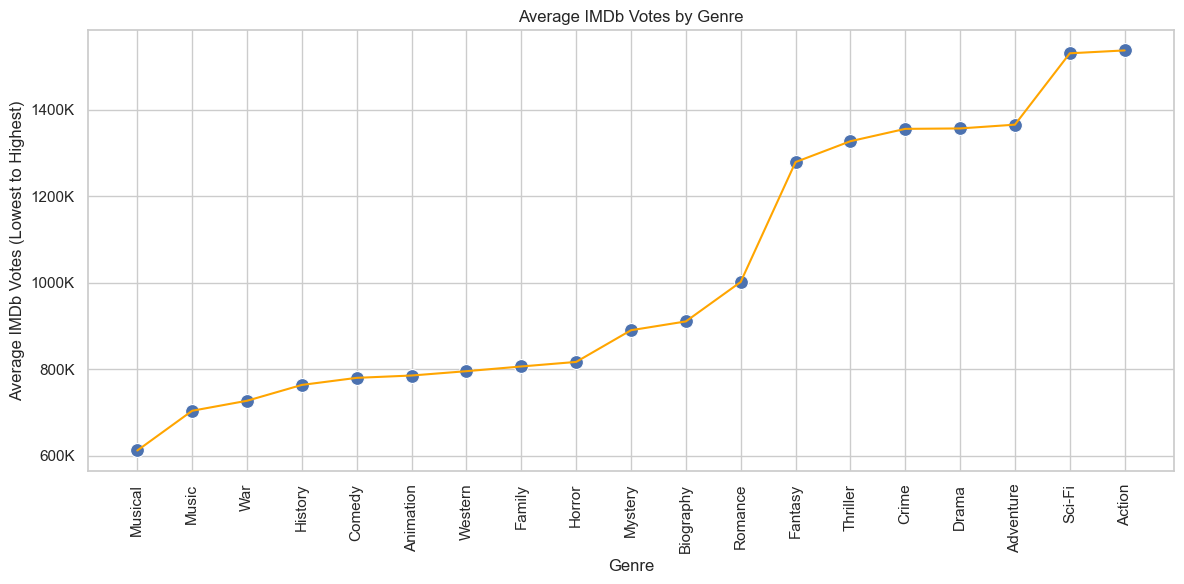

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate the average IMDb votes for each genre
genre_avg_votes = {}
for genre in genre_counts.index:
    genre_avg_votes[genre] = df[df["Genres"].str.contains(genre)]["Votes"].mean()

# Find the genre with the highest average IMDb votes
highest_avg_votes_genre = max(genre_avg_votes, key=genre_avg_votes.get)

print(f"The genre with the highest average IMDb votes is '{highest_avg_votes_genre}'")

# Create a DataFrame for genre_avg_votes
avg_votes_df = pd.DataFrame(list(genre_avg_votes.items()), columns=["Genre", "Avg IMDb Votes"])

# Sort the DataFrame by "Avg IMDb Votes" in ascending order
avg_votes_df = avg_votes_df.sort_values(by="Avg IMDb Votes")

# Create a scatter plot with a line using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_votes_df, x="Genre", y="Avg IMDb Votes", marker='o', s=100)
sns.lineplot(data=avg_votes_df, x="Genre", y="Avg IMDb Votes", color='orange')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Format y-axis labels to start with 600K
def format_func(value, tick_number):
    if value >= 10000:
        return f'{int(value/1000)}K'
    else:
        return int(value)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.title("Average IMDb Votes by Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Votes (Lowest to Highest)")
plt.tight_layout()
plt.show()

 ### 4. Which year had the highest number of movie releases in the dataset? 

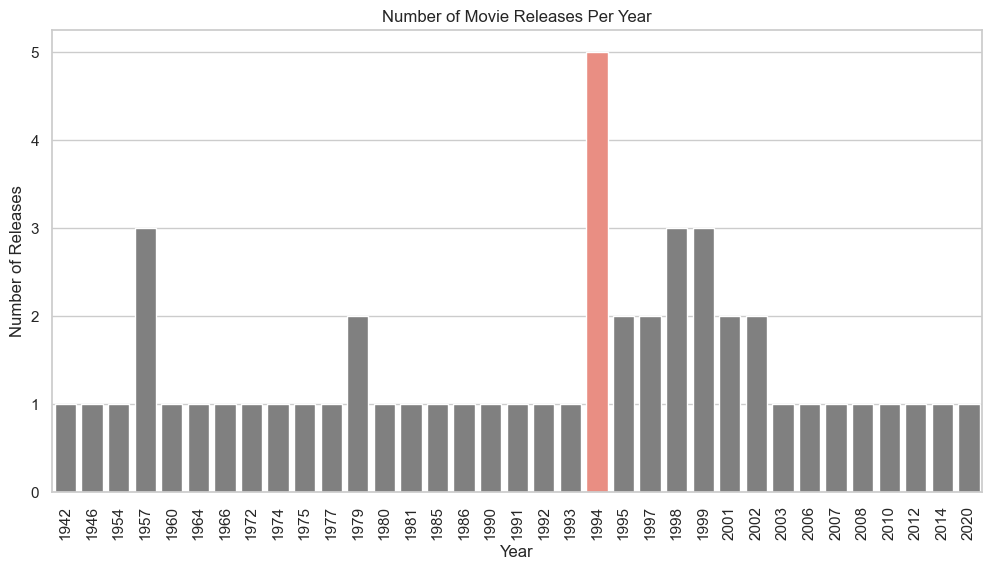

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by "Year" and count the number of movies in each year
yearly_movie_counts = df["Year"].value_counts().reset_index()
yearly_movie_counts.columns = ["Year", "Number of Releases"]

# Sort the data by year
yearly_movie_counts = yearly_movie_counts.sort_values(by="Year")

# Find the year with the highest number of releases
highest_year = yearly_movie_counts.loc[yearly_movie_counts["Number of Releases"].idxmax()]["Year"]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Number of Releases", data=yearly_movie_counts, palette=["salmon" if year == highest_year else "grey" for year in yearly_movie_counts["Year"]])
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Number of Movie Releases Per Year")
plt.show()
